## Efemeridska astronomija - Vežbe 1 - PyEphem tutorijal

PyEphem je Python biblioteka koja korisnicima pruža lak pristup brojnim astronomskim alatima. Zasnovana je na poznatom UNIX programu [XEphem](https://github.com/XEphem/XEphem). U ovoj svesci će biti opisane i objašnjene osnovne funkcije koje nam ova biblioteka pruža.

Kod biblioteke u naš program uvozimo sledećom komandom:

In [1]:
import ephem

## Rad sa nebeskim telima

PyEphem ima mogućnost da za dato nebesko telo izračuna njegov položaj i karakteristike za određenog posmatrača u određenom trenutku. U biblioteci postoje već napravljene klase za nebeska tela koja je autor očekivao da će biti često korišćena, uključujući Sunce, Mesec, sve planete Sunčevog Sistema i neke bitne mesece.

Ove klase instanciramo na sledeći način:

In [2]:
M = ephem.Mars()
S = ephem.Sun()

PyEphem takođe raspolaže i skromnim katalogom od 115 svetlih zvezda. Kompletan spisak ovih zvezda se može naći u izvornom kodu na [ovom linku](https://github.com/brandon-rhodes/pyephem/blob/master/ephem/stars.py).

Ove zvezde instanciramo tako što konstruktoru klase *star* prosledimo ime zvezde čije podatke želimo da dobijemo, i to na sledeći način:

In [3]:
A = ephem.star("Arcturus")

### Nebeska tela za dati trenutak

Kako se nebeska tela kreću, često nam je bitno da znamo njihov položaj u određenom trenutku. Svaki objekat koji predstavlja nebesko telo sadrži metodu *compute* koja računa karakteristike tog tela za trenutak u vremenu koji je prosleđen kao argument.

Ukoliko metodi ne prosledimo argument, karakteristike nebeskog tela će biti izračunate za trenutno vreme računara na kom se kod izvršava.

In [4]:
M.compute("2002/10/20")
print("%s 2002. godine\
    \nelongacija: %s \nveličina: %.11f\n" % (M.name, M.elong, M.size))

M.compute("2012/10/20")
print("%s 2012. godine\
    \nelongacija: %s \nveličina: %.11f\n" % (M.name, M.elong, M.size))

M.compute()
print("%s sada:\
      \nelongacija: %s \nveličina: %.11f\n" % (M.name, M.elong, M.size))


Mars 2002. godine    
elongacija: -23:43:37.4 
veličina: 3.70745754242

Mars 2012. godine    
elongacija: 42:12:12.7 
veličina: 4.64552783966

Mars sada:      
elongacija: 159:12:12.7 
veličina: 15.74976539612



Nebeska tela u PyEphemu sadrže brojne atribute koji sadrže karakteristike nebeskih tela. Neke od njih su sledeće:

In [5]:
print(f"Rektascenzija: {M.ra}")
print(f"Deklinacija: {M.dec}")
print(f"Magnituda: {M.mag}")
print(f"Ugaoni poluprečnik: {M.radius}")

Rektascenzija: 4:35:43.84
Deklinacija: 24:45:53.9
Magnituda: -1.42
Ugaoni poluprečnik: 0:00:07.9


Kompletan spisak se može dobiti pozivanjem ugrađene funkcije *dir*, koja vraća sve atribute objekta koji joj je prosleđen.

In [6]:
print(dir(M))

['__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__planet__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'az', 'circumpolar', 'compute', 'copy', 'dec', 'earth_distance', 'elong', 'g_dec', 'g_ra', 'ha', 'hlat', 'hlon', 'hlong', 'mag', 'name', 'neverup', 'parallactic_angle', 'phase', 'ra', 'radius', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sun_distance', 'transit_alt', 'transit_time', 'writedb']


### Nebeska tela za datog posmatrača

Primećujemo da neki od gorenavedenih atributa, kao što su azimut i visina, ne mogu biti određeni samo na osnovu datuma, jer zavise od posmatrača. Kada su nam potrebne takve vrednosti, umesto datuma, metodi *compute* možemo proslediti i posmatrača.

PyEphem nam pruža klasu *Observer*, čijim instanciranjem možemo napraviti objekat koji odgovara određenom posmatraču, a čije karakteristike zadajemo na sledeći način:

In [7]:
bg = ephem.Observer()
bg.lon = "44.787197"
bg.lat = "20.457273"
bg.elevation = 117

S = ephem.Sun(bg)
print(f"Trenutno iz Beograda vidimo Sunce na horizontskim koordinatama:")
print(f"Azimut: {S.az}")
print(f"Visina: {S.alt}")

Trenutno iz Beograda vidimo Sunce na horizontskim koordinatama:
Azimut: 201:52:46.2
Visina: 43:00:28.5


## Kreiranje grafika

Često nam je korisno da vizuelno prikažemo kako se neke vrednosti menjaju u odnosu na neke druge. Kako PyEphem ne pruža ovakve mogućnosti, za crtanje grafika možemo da koristimo biblioteku *matplotlib*. Ova biblioteka sadrži metodu *plot* koja prima ulaze i izlaze u n diskretnih trenutaka, i interpolacijom nam prikazuje kontinualnu funkciju.

Naredni kod ilustruje ovo na jednostavnom primeru grafika udaljenosti Meseca i Sunca u toku 2022. godine.

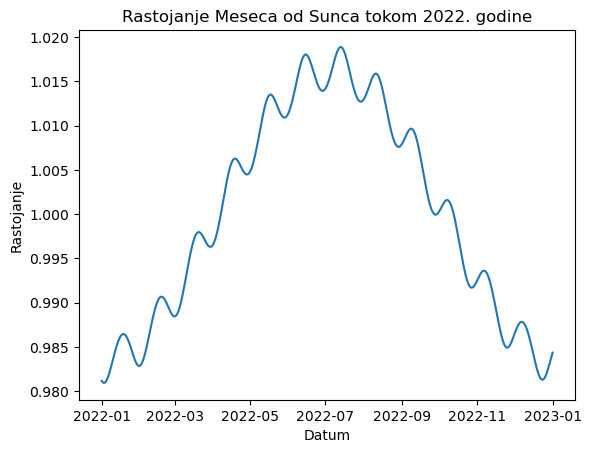

In [8]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt

t = pd.date_range(start='2022-01-01',
                  end='2023-01-01',
                  periods=365)

moon = ephem.Moon()
distances = []

for date in t:
    moon.compute(date)
    distances.append(moon.sun_distance)
    
    
plt.plot(t, distances)
plt.title("Rastojanje Meseca od Sunca tokom 2022. godine")
plt.ylabel("Rastojanje")
plt.xlabel("Datum")


plt.show()
    

Ne moramo uvek crtati funkcije, već na graficima možemo tačkama beležiti diskretne vrednosti, za šta koristimo metodu *scatter*. Primer za to je sledeći kod koji za posmatrača u Beogradu prikazuje visinu Marsa na nebu na svaki pun sat tokom 20. oktobra 2022. godine.

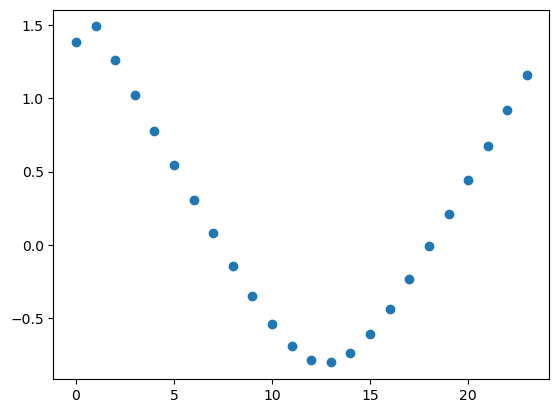

In [9]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt

t = pd.date_range(start='2022-10-20',
                  end='2022-10-21',
                  periods=24)

mars = ephem.Mars()
sati = numpy.arange(0,24,1)
alts = []

for i in sati:
    bg.date = f"2022/10/20 {i}:00"
    mars.compute(bg)
    alts.append(mars.alt)


plt.scatter(sati, alts)
plt.show()
    

Biblioteka *matplotlib* nam pruža i mogućnost da na istom grafiku prikažemo više funkcija na čitljiv način, što je pokazano na sledećem primeru.

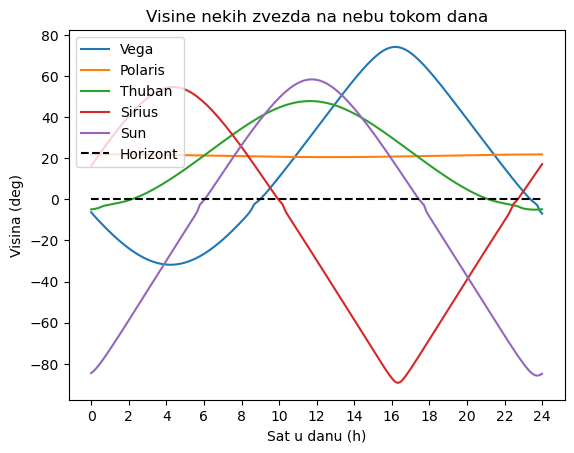

In [10]:
x = numpy.linspace(0,24,192)
timestamps = pd.date_range(start="2022/10/27 21:00",
                           end="2022/10/28 21:00",
                           periods=192)

def plotStar(star):
    alts = []
    for i in timestamps:
        bg.date = i
        star.compute(bg)
        alts.append(star.alt*59.3) # rad -> deg
    
    plt.plot(x, alts, label=star.name)
    

plotStar(ephem.star("Vega"))
plotStar(ephem.star("Polaris"))
plotStar(ephem.star("Thuban"))
plotStar(ephem.star("Sirius"))
plotStar(ephem.Sun())

plt.plot(x, x*0, "k--", label="Horizont")
plt.xlabel("Sat u danu (h)")
plt.ylabel("Visina (deg)")
plt.xticks(numpy.linspace(0,24,13))
plt.legend(loc=2)
plt.title("Visine nekih zvezda na nebu tokom dana")
plt.show()